### In this project, I am going to predict churning in credit card customers of a bank. 

In [183]:
#Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#Loading the dataset as a dataframe
bank = pd.read_csv("BankChurners.csv")

In [185]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [186]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

First lets check if there are any null values present in the data.

In [187]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [188]:
bank.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


We can see there are no null values in the dataset. The final two columns and columns Total_Amt_Chng_Q4_Q1 Total_Ct_Chng_Q4_Q1 are not required as they will be rarely used in the analysis of the data. So it is better to remove them

In [189]:
bank.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'], inplace = True)

Next I will drop duplicates from the data and remove client number.

In [190]:
bank = bank.drop_duplicates()

In [191]:
bank = bank.drop(columns = 'CLIENTNUM')

In [201]:
bank.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [192]:
#Checking what are all the education levels of the credit card customers
bank['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

Before proceeding with the analysis, there is an obvious transformation to be made to the data. The requirement is to predit customer churn. So the column Attrition_Flag will be used for prediction. In order to predict it needs to be converted to categorical first

In [193]:
bank['Attrition_Flag'] = bank['Attrition_Flag'].apply(lambda x: 0 if x == "Existing Customer" else 1)

Now the Attrition Flag is changed to Categorical variable

## Now I will visualize the data 

##### Data Visualization of Education Level

First lets visualize the credit card customers based on education level. As we know Education level is non-numeric type. So we cannot directly plot them. Instead we will plot the counts of the education level. 

<Axes: ylabel='Education_Level'>

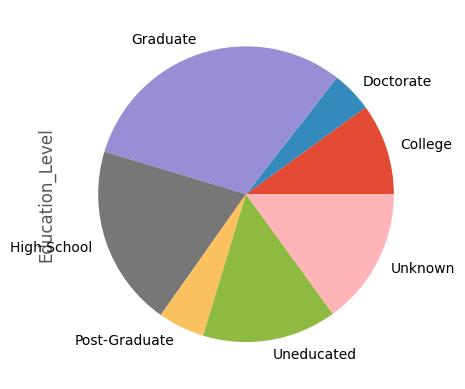

In [194]:
bank.groupby('Education_Level')['Education_Level'].count().plot.pie(y = 'Education_Level')

From the above pie chart it is understood that Graduate students are high in number as credit card customers.

##### Data Visualization on Income Category 

[Text(0, 0, '1402'),
 Text(0, 0, '3561'),
 Text(0, 0, '1535'),
 Text(0, 0, '1790'),
 Text(0, 0, '727'),
 Text(0, 0, '1112')]

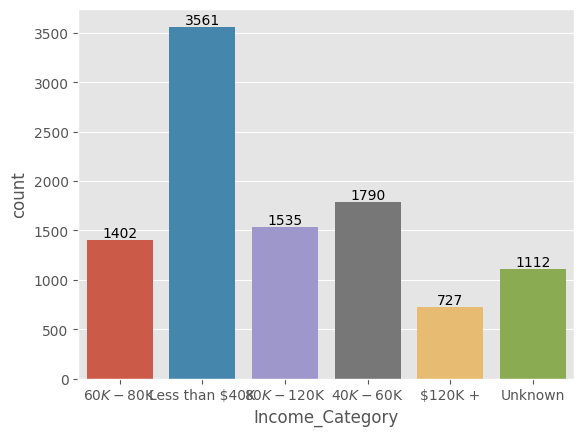

In [195]:
ax = sns.countplot(data = bank, x = 'Income_Category')
ax.bar_label(ax.containers[0])

The above graph depicts that there is high distribution of credit cards among customers with income category less than 40k. Now lets visualize distribution of credit card customers.   

##### I will now check the churn on Credit Card Category

<Axes: xlabel='Attrition_Flag', ylabel='Card_Category'>

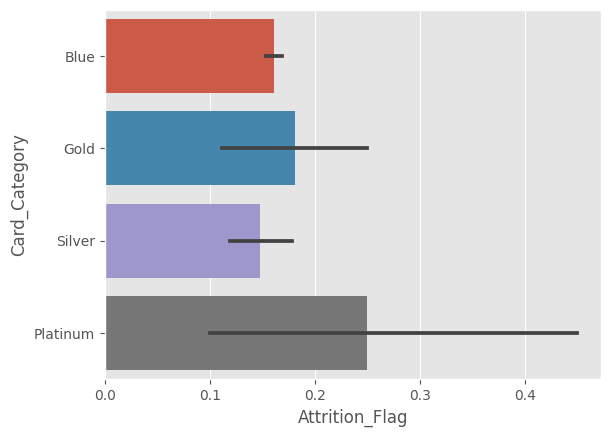

In [196]:
sns.barplot(data = bank, x = 'Attrition_Flag', y = 'Card_Category')

Here we can see that users with a credit card category Silver have higher churning rate than other customers.

##### Checking churn among customers corresponding  to their marital status

<Axes: xlabel='Marital_Status', ylabel='count'>

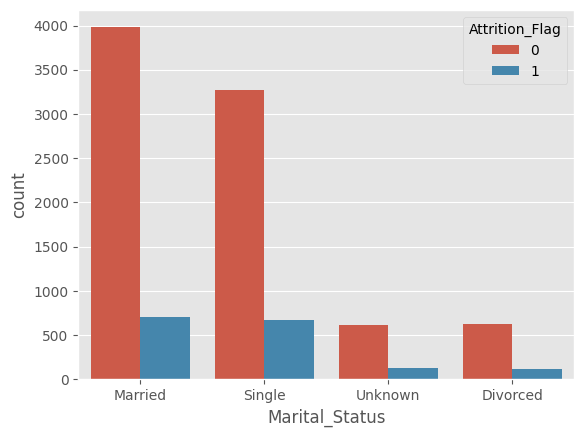

In [197]:
sns.countplot(data = bank, x = 'Marital_Status', hue = 'Attrition_Flag')

##### Now to determine the outliers in the data, using box plot on Total Transaction count and Total Revolving Balance

Text(0.5, 1.0, 'Attrition based on Transactions')

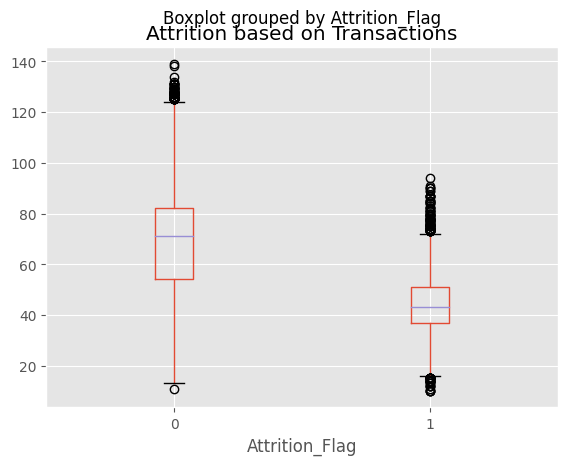

In [198]:
bank.boxplot(column = 'Total_Trans_Ct', by = 'Attrition_Flag')
plt.title("Attrition based on Transactions")

The customers with higher transaction counts are staying with the bank.

We can see there are a lot of outliers in this dataset. Especially for customers who are churining. This shows, the bank have to bring in new ways or benefits for their credit card customers for them to stay with them.

<Axes: title={'center': 'Total_Revolving_Bal'}, xlabel='Attrition_Flag'>

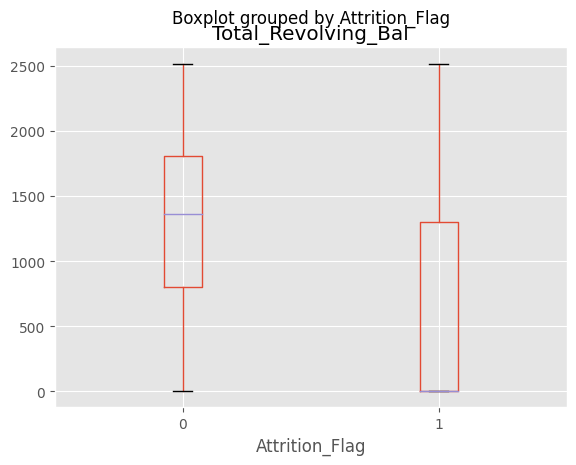

In [199]:
bank.boxplot(column = 'Total_Revolving_Bal', by = 'Attrition_Flag')

Based on the figures above, we can understand that churned customers have less usage and less transactions than unchurned customers. 

We can check the attrition among credit card customers orresponding to transaction count and transaction amount

##### Visualization corresponding to count and transactions

<Axes: xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

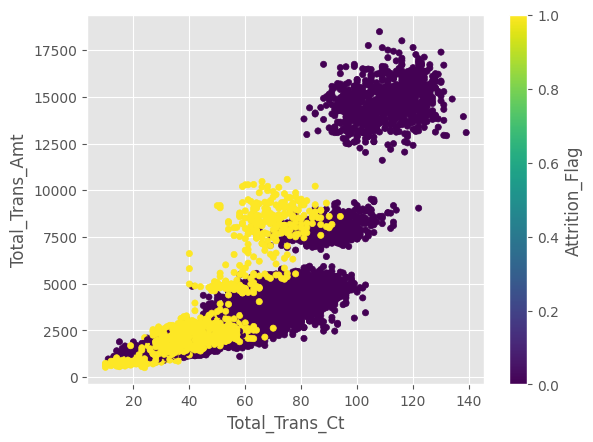

In [200]:
bank.plot.scatter(x = 'Total_Trans_Ct', y = 'Total_Trans_Amt', c = 'Attrition_Flag', colormap = 'viridis')

From the above graph we can observe that the customers which high transaction count and high transaction amount tend to stay with the bank. This is evident with high attrition value of 0.